In [1]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn 
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline



## Loading the Data

In [2]:
dataset = panda.read_csv("HateSpeechData.csv")
dataset

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
5               5      3            1                   2        0      1   
6               6      3            0                   3        0      1   
7               7      3            0                   3        0      1   
8               8      3            0                   3        0      1   
9               9      3            1                   2        0      1   
10             10      3            0                   3        0      1   
11             11      3            0                   3        0      1   
12             12      3            0                   2        1      1   
13             13      3            0                   3        0      1   
14             14      3            1                   2        0      1   
15             15      3            0                   3        0      1   
16             16      3            0                   3        0      1   
17             17      3            1                   2        0      1   
18             18      3            0                   3        0      1   
19             19      3            0                   3        0      1   
20             20      3            0                   3        0      1   
21             21      3            0                   3        0      1   
22             22      3            0                   3        0      1   
23             23      3            0                   3        0      1   
24             24      3            0                   3        0      1   
25             25      3            0                   2        1      1   
26             26      3            0                   3        0      1   
27             27      3            0                   3        0      1   
28             28      3            0                   3        0      1   
29             29      3            0                   3        0      1   
...           ...    ...          ...                 ...      ...    ...   
24753       25266      3            1                   2        0      1   
24754       25267      3            0                   3        0      1   
24755       25268      3            0                   3        0      1   
24756       25269      3            0                   3        0      1   
24757       25270      3            0                   3        0      1   
24758       25271      3            0                   3        0      1   
24759       25272      3            0                   3        0      1   
24760       25273      3            0                   2        1      1   
24761       25274      3            0                   3        0      1   
24762       25275      3            1                   2        0      1   
24763       25276      3            0                   2        1      1   
24764       25277      3            0                   3        0      1   
24765       25278      3            0                   3        0      1   
24766       25279      3            0                   3        0      1   
24767       25280      3            0                   1        2      2   
24768       25281      3            0                   3        0      1   
24769       25282      3            0                   3        0      1   
24770       25283      3            0                   3        0      1   
24771       25284      3            0                   3        0      1   
24772       25285      3            0                   3        0      1   
247

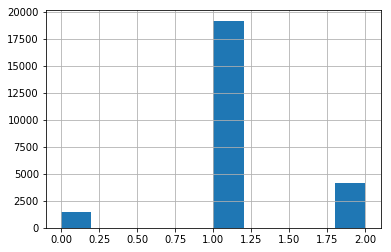

In [3]:
dataset['class'].hist()

In [4]:
##The above histogram shows that most of the tweets are considered to be offensive words by the CF coders.

In [5]:
# collecting only the tweets from the csv file into a variable name tweet
tweet=dataset.tweet

## Preprocessing of the tweets

In [6]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")  
    # removal of capitalization
    tweet_lower = punc_remove.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)   

dataset['processed_tweets'] = processed_tweets
dataset

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
5               5      3            1                   2        0      1   
6               6      3            0                   3        0      1   
7               7      3            0                   3        0      1   
8               8      3            0                   3        0      1   
9               9      3            1                   2        0      1   
10             10      3            0                   3        0      1   
11             11      3            0                   3        0      1   
12             12      3            0                   2        1      1   
13             13      3            0                   3        0      1   
14             14      3            1                   2        0      1   
15             15      3            0                   3        0      1   
16             16      3            0                   3        0      1   
17             17      3            1                   2        0      1   
18             18      3            0                   3        0      1   
19             19      3            0                   3        0      1   
20             20      3            0                   3        0      1   
21             21      3            0                   3        0      1   
22             22      3            0                   3        0      1   
23             23      3            0                   3        0      1   
24             24      3            0                   3        0      1   
25             25      3            0                   2        1      1   
26             26      3            0                   3        0      1   
27             27      3            0                   3        0      1   
28             28      3            0                   3        0      1   
29             29      3            0                   3        0      1   
...           ...    ...          ...                 ...      ...    ...   
24753       25266      3            1                   2        0      1   
24754       25267      3            0                   3        0      1   
24755       25268      3            0                   3        0      1   
24756       25269      3            0                   3        0      1   
24757       25270      3            0                   3        0      1   
24758       25271      3            0                   3        0      1   
24759       25272      3            0                   3        0      1   
24760       25273      3            0                   2        1      1   
24761       25274      3            0                   3        0      1   
24762       25275      3            1                   2        0      1   
24763       25276      3            0                   2        1      1   
24764       25277      3            0                   3        0      1   
24765       25278      3            0                   3        0      1   
24766       25279      3            0                   3        0      1   
24767       25280      3            0                   1        2      2   
24768       25281      3            0                   3        0      1   
24769       25282      3            0                   3        0      1   
24770       25283      3            0                   3        0      1   
24771       25284      3            0                   3        0      1   
24772       25285      3            0                   3        0      1   
247

## Visualizations

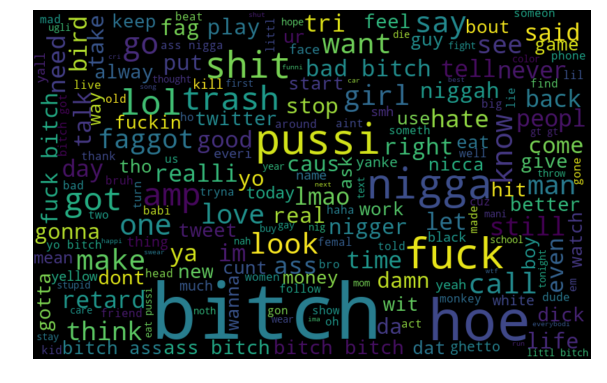

In [8]:
# visualizing which of the word is most commonly used in the twitter dataset

import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([text for text in dataset['processed_tweets'] ]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

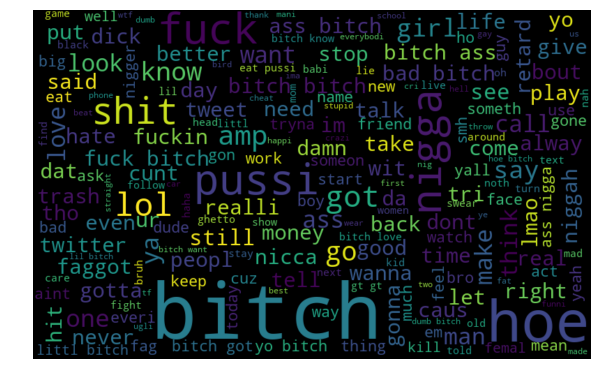

In [9]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in dataset['processed_tweets'][dataset['class'] == 1]])     
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

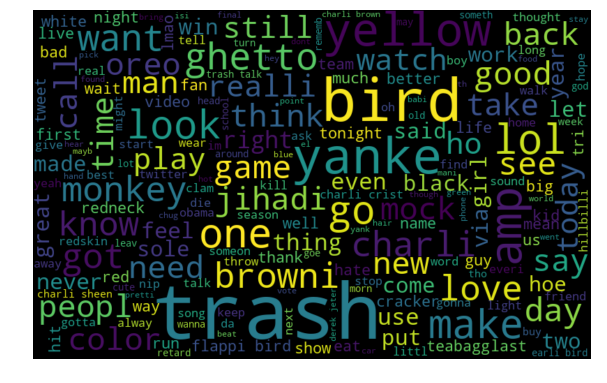

In [10]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in dataset['processed_tweets'][dataset['class'] == 2]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Feature Generation

In [11]:
# Bigram Features

bigram_vectorizer = CountVectorizer(ngram_range=(1,2),max_df=0.75, min_df=1, max_features=10000)
# bigram feature matrix
bigram = bigram_vectorizer.fit_transform(processed_tweets).toarray()
bigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
#TF-IDF Features

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweets'] )
tfidf

<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

## Building Models using Logistic Regression

In [13]:
# Using Bigram Features
X = panda.DataFrame(bigram)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


model = LogisticRegression(class_weight='balanced',penalty="l1", C=0.01).fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))


             precision    recall  f1-score   support

          0       0.43      0.41      0.42       164
          1       0.97      0.84      0.90      1905
          2       0.59      0.97      0.74       410

avg / total       0.87      0.83      0.84      2479

Accuracy Score: 0.8342073416700282


In [14]:
# Running the model Using TFIDF without additional features

X = tfidf
y = dataset['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.56      0.12      0.19       164
          1       0.90      0.97      0.93      1905
          2       0.84      0.81      0.83       410

avg / total       0.87      0.88      0.86      2479

Accuracy Score: 0.8846308995562727


In [15]:
# Sentiment Analysis
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)
#final_features

new_features = panda.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],'Compound':final_features[:,3],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

Neg    Pos    Neu  Compound  url_tag  mention_tag  hash_tag
0      0.000  0.120  0.880    0.4563      0.0          1.0       0.0
1      0.237  0.000  0.763   -0.6876      0.0          1.0       0.0
2      0.538  0.000  0.462   -0.9550      0.0          2.0       0.0
3      0.000  0.344  0.656    0.5673      0.0          2.0       0.0
4      0.249  0.081  0.669   -0.7762      0.0          1.0       1.0
5      0.101  0.155  0.744    0.3046      0.0          1.0       3.0
6      0.464  0.000  0.536   -0.9325      0.0          1.0       0.0
7      0.420  0.000  0.580   -0.8388      0.0          1.0       2.0
8      0.000  0.235  0.765    0.4717      0.0          0.0       0.0
9      0.612  0.000  0.388   -0.7430      0.0          1.0       0.0
10     0.310  0.256  0.434   -0.2789      0.0          0.0       0.0
11     0.432  0.000  0.568   -0.5859      0.0          0.0       0.0
12     0.254  0.000  0.746   -0.5267      0.0          0.0       0.0
13     0.497  0.168  0.336   -0.7096      0.0          0.0       0.0
14     0.487  0.000  0.513   -0.5859      0.0          0.0       0.0
15     0.574  0.000  0.426   -0.6597      0.0          0.0       0.0
16     0.623  0.213  0.164   -0.5423      0.0          0.0       0.0
17     0.345  0.382  0.273    0.1027      0.0          0.0       0.0
18     0.667  0.000  0.333   -0.7184      0.0          0.0       0.0
19     0.709  0.000  0.291   -0.8074      0.0          0.0       0.0
20     0.623  0.000  0.377   -0.7650      0.0          0.0       0.0
21     0.563  0.243  0.194   -0.5106      0.0          0.0       0.0
22     0.000  0.000  1.000    0.0000      0.0          0.0       0.0
23     0.447  0.175  0.378   -0.8356      0.0          0.0       3.0
24     0.275  0.000  0.725   -0.5859      1.0          0.0       1.0
25     0.000  0.537  0.463    0.7003      0.0          0.0       1.0
26     0.000  0.000  1.000    0.0000      0.0          0.0       0.0
27     0.000  0.000  1.000    0.0000      0.0          0.0       1.0
28     0.593  0.000  0.407   -0.8074      0.0          0.0       0.0
29     0.314  0.107  0.579   -0.5423      0.0          0.0       0.0
...      ...    ...    ...       ...      ...          ...       ...
24753  0.000  0.263  0.737    0.3612      0.0          0.0       0.0
24754  0.000  0.000  1.000    0.0000      0.0          0.0       0.0
24755  0.298  0.321  0.382    0.0772      0.0          0.0       0.0
24756  0.384  0.179  0.437   -0.6900      0.0          1.0       2.0
24757  0.000  0.000  1.000    0.0000      0.0          0.0       0.0
24758  0.405  0.184  0.411   -0.7913      0.0          0.0       0.0
24759  0.440  0.000  0.560   -0.4847      0.0          0.0       0.0
24760  0.375  0.000  0.625   -0.3400      0.0          0.0       0.0
24761  0.508  0.000  0.492   -0.4767      0.0          0.0       0.0
24762  0.612  0.000  0.388   -0.7430      0.0          0.0       0.0
24763  0.252  0.000  0.748   -0.5719      1.0          0.0       0.0
24764  0.504  0.000  0.496   -0.7269      0.0          0.0       0.0
24765  0.000  0.000  1.000    0.0000      0.0          0.0       0.0
24766  0.000  0.206  0.794    0.0772      0.0          0.0       0.0
24767  0.000  0.000  1.000    0.0000      0.0          0.0       0.0
24768  0.407  0.237  0.356   -0.6486      0.0          0.0       0.0
24769  0.364  0.000  0.636   -0.8977      0.0          0.0       0.0
24770  0.000  0.238  0.762    0.3612      0.0          0.0       0.0
24771  0.378  0.148  0.474   -0.5984      0.0          0.0       1.0
24772  0.000  0.208  0.792    0.2732      0.0          0.0       0.0
24773  0.333  0.000  0.667   -0.4588      0.0          0.0       0.0
24774  0.362  0.178  0.459   -0.5584      0.0          0.0       0.0
24775  0.466  0.000  0.534   -0.7269      0.0          0.0       0.0
24776  0.000  0.000  1.000    0.0000      0.0          0.0       0.0
24777  0.430  0.104  0.466   -0.8777      0.0          1.0       0.0
24778  0.000  0.000  1.000    0.0000      0.0          3.0       3.0
24779  

In [16]:
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape

(24783, 6448)

In [17]:
# Running the model Using TFIDF with some features from sentiment analysis

X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.58      0.12      0.19       164
          1       0.90      0.97      0.94      1905
          2       0.86      0.84      0.85       410

avg / total       0.87      0.89      0.87      2479

Accuracy Score: 0.8922952803549818


In [18]:
def additional_features(tweet): 
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))
    
    ###Modified FK grade, where avg words per sentence is just num words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

fFeatures = get_additonal_feature_array(processed_tweets)


In [19]:
tfidf_a = tfidf.toarray()
modelling_features_enhanced = np.concatenate([tfidf_a,final_features,fFeatures],axis=1)
modelling_features_enhanced.shape

(24783, 6457)

In [20]:
# Running the model Using TFIDF with additional features from sentiment analysis

X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

model = LogisticRegression().fit(X_train_features,y_train)
y_preds = model.predict(X_test_features)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))



             precision    recall  f1-score   support

          0       0.61      0.13      0.22       164
          1       0.91      0.97      0.94      1905
          2       0.84      0.85      0.85       410

avg / total       0.88      0.89      0.87      2479

Accuracy Score: 0.8918918918918919


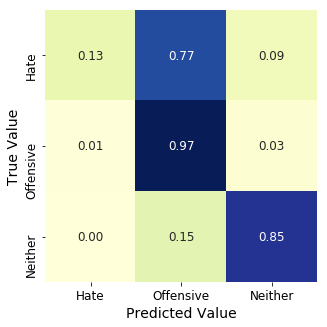

In [21]:
#Confusion Matrix for TFIDF with additional features 
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)